<a href="https://colab.research.google.com/github/so-dipe/Internships/blob/main/TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf #Note that we use statsmodels not sklearn for timeseries 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#get kaggle API token
url = 'https://raw.githubusercontent.com/so-dipe/so-dipe/main/kaggle.json'
r = requests.get(url, allow_redirects=True)
open('kaggle.json', 'wb').write(r.content)


66

In [6]:
#get dataset from kaggle with API
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d jameslko/gun-violence-data

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 27% 9.00M/33.6M [00:01<00:04, 5.85MB/s]
100% 33.6M/33.6M [00:01<00:00, 23.2MB/s]


In [7]:
#unzip dataset
! unzip gun-violence-data.zip

Archive:  gun-violence-data.zip
  inflating: gun-violence-data_01-2013_03-2018.csv  


In [40]:
#import data
df = pd.read_csv('/content/gun-violence-data_01-2013_03-2018.csv')
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


The dataset has a lot of columns, so we quickly check the overview of everything.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

As we can see here, this data contains a lot of columns and most won't be useful for the Time Series Model.
At first glance, only `date`, `n_killed` and `n_injured` seem useful for the Time Series.

To make a time series prediction, we would generally need a column has datatype `int` or `float`. 

We might also keep the `n_guns_involved`, but note that we can only use one of these columns as most (not all) Time Series models do not use multiple features

In [42]:
df = df[['date', 'n_killed', 'n_injured', 'n_guns_involved']]
df.head()

,date,n_killed,n_injured,n_guns_involved
0,2013-01-01,0,4,NaN
1,2013-01-01,1,3,NaN
2,2013-01-01,1,3,2.0
3,2013-01-05,4,0,NaN
4,2013-01-07,2,2,2.0


The dataset looks less complex now. But we need to do a little cleaning.

The date column has dtype `object` but we need it in form of `datetime` object and also as the index of the dataframe

We can do this easily using pandas `to_datetime` function.

In [43]:
df['date'] = pd.to_datetime(df['date'])

In [44]:
#set index to date
df.set_index('date', inplace=True)

In [45]:
df.head()

,n_killed,n_injured,n_guns_involved
date,,,
2013-01-01,0,4,NaN
2013-01-01,1,3,NaN
2013-01-01,1,3,2.0
2013-01-05,4,0,NaN
2013-01-07,2,2,2.0


Now that we have set the index to the particular date, we still have to aggregate.

From what we can see above and probably common knowledge, crime (gun violence) takes place more than once in a day and this lead to multiple entries (examples)in the dataframe having the same date (index).

This can be done in different ways... 🤔

In [46]:
daily_index = pd.DatetimeIndex(df.index).to_period('D')

In [47]:
daily_df = df.groupby(daily_index).sum()

In [48]:
daily_df.head()

,n_killed,n_injured,n_guns_involved
date,,,
2013-01-01,2,10,2.0
2013-01-05,4,0,0.0
2013-01-07,6,2,2.0
2013-01-19,5,0,2.0
2013-01-21,0,9,0.0


That worked... 😀

Now, lets create a quick line plot to see how things are... 😩

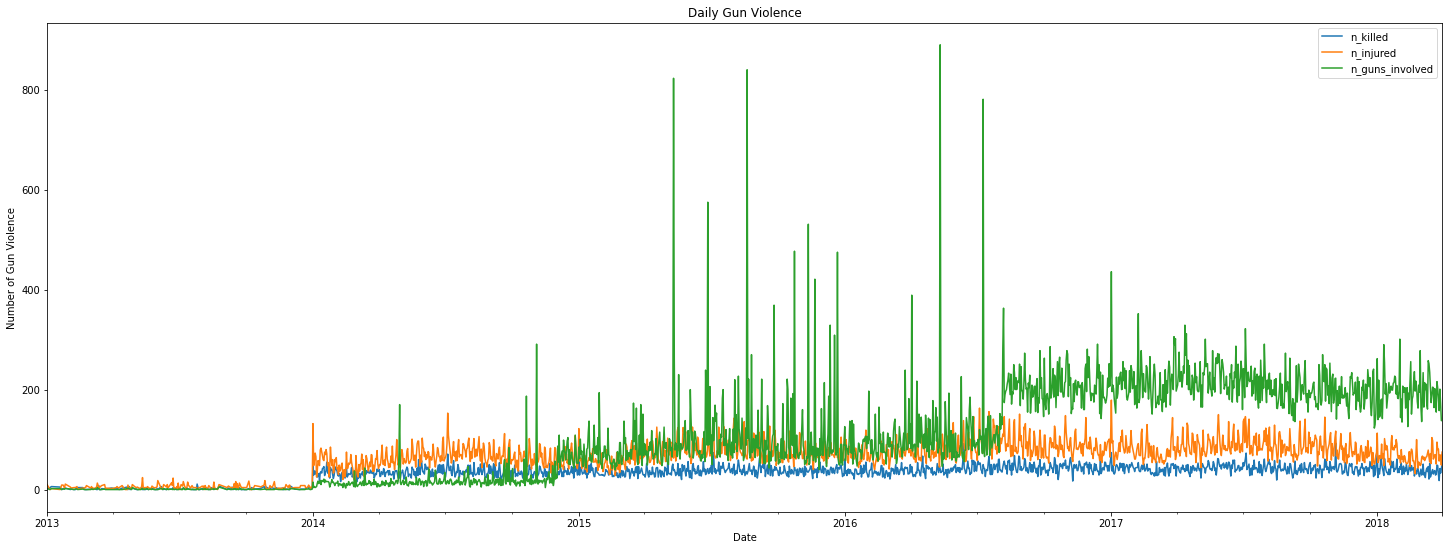

In [49]:
fig, ax = plt.subplots(figsize=(25, 9)) #Freat not, this command here just sets the size of the figure
daily_df.plot(kind='line', ax=ax) #The actual plotting function (note ax=ax, that tells python where to plot)
plt.title('Daily Gun Violence')
plt.ylabel('Number of Gun Violence')
plt.xlabel('Date');

*Yh, I know... I can never find the right title for my plots* 😩

The plot looks messy and I was thinking, since the data is from `2013` to `2018`, we could aggreate over a much larger time period like a week or month.

To do that, we revisit a previous cell... 🚶

In [53]:
weekly_index = pd.DatetimeIndex(df.index).to_period('W')
weekly_df = df.groupby(weekly_index).sum()
weekly_df.head()

,n_killed,n_injured,n_guns_involved
date,,,
2012-12-31/2013-01-06,6,10,2.0
2013-01-07/2013-01-13,6,2,2.0
2013-01-14/2013-01-20,5,0,2.0
2013-01-21/2013-01-27,6,32,4.0
2013-01-28/2013-02-03,1,8,2.0


Now, we have the data over a weekly period, though I have to admit I wasn't expecting the index to look like this... 

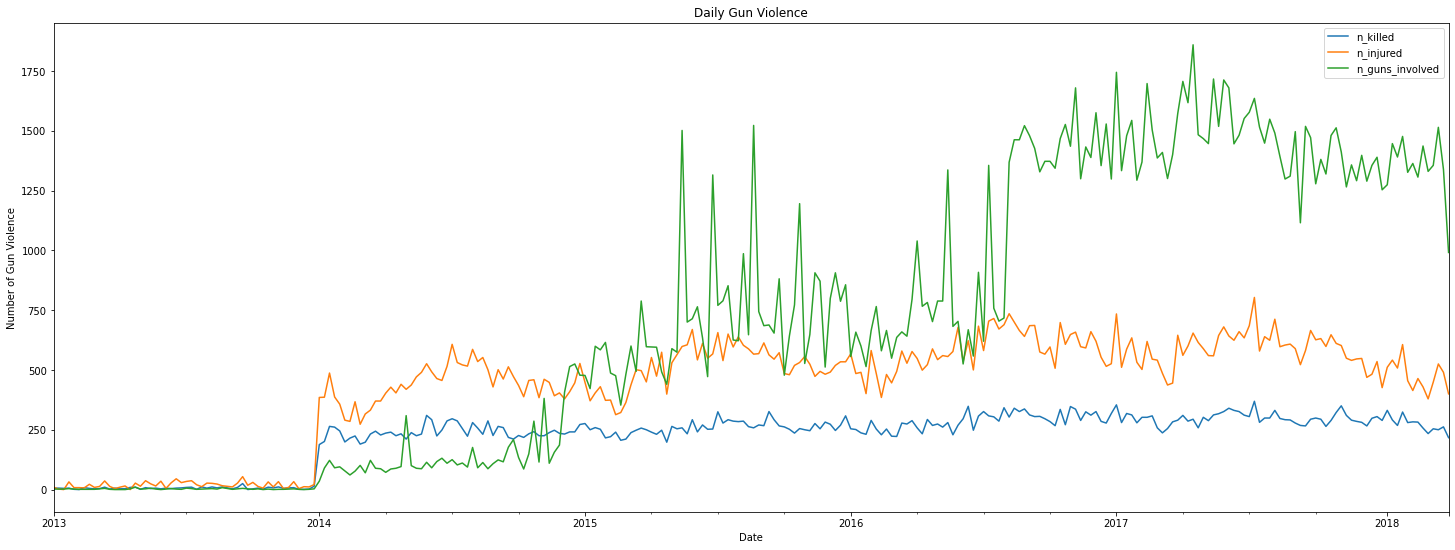

In [54]:
# Ploting weekly_df
fig, ax = plt.subplots(figsize=(25, 9)) #Freat not, this command here just sets the size of the figure
weekly_df.plot(kind='line', ax=ax) #The actual plotting function (note ax=ax, that tells python where to plot)
plt.title('Weekly Gun Violence')
plt.ylabel('Number of Gun Violence')
plt.xlabel('Date');

Wow, a lot better...

But now I worry I do not have enough data to make a really nice Time Series Prediction Model... (*overthinking...*)

So lets see how much that we have...

In [56]:
weekly_df.shape

(273, 3)

Wow, only 273 rows (examples). That's not a lot and might not be good for the Time Series (usually ML models require a lot of data).

I would still carry on using the weekly data `weekly_df` for Time Series Analysis, but might have to go back to the daily data `daily_df`

In [57]:
daily_df.shape

(1725, 3)

`daily_df` has way more data (not a lot) but probably good enough for creating small prediction models.

## Time Series Analysis (TSA)

Just a little analysis here to check to Autocorrelation and Partial Autocorrelation of the data we've got here. 

(I change my mind, I would do the TSA of both dataset at the same time) 🥲

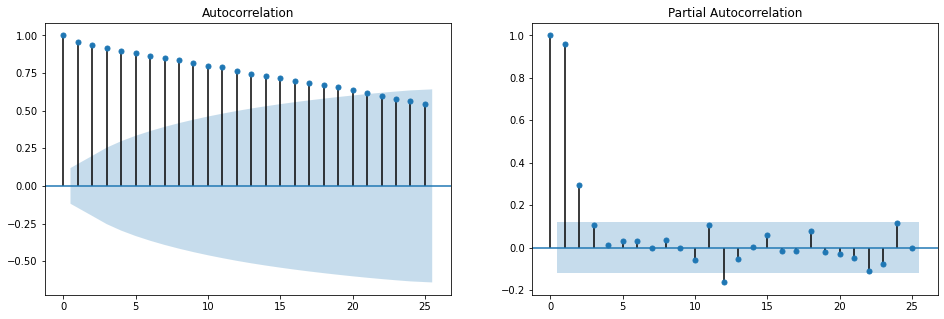

In [61]:
fig, ax = plt.subplots(figsize=(16, 5), nrows=1, ncols=2)
plot_acf(weekly_df['n_killed'], ax[0])
plot_pacf(weekly_df['n_killed'], ax=ax[1]);

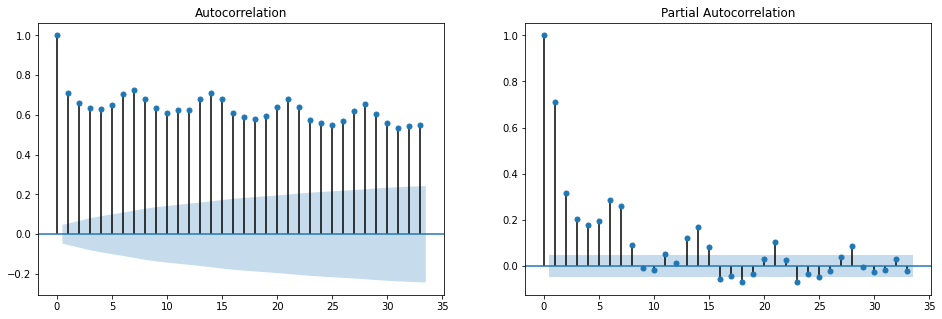

In [62]:
fig, ax = plt.subplots(figsize=(16, 5), nrows=1, ncols=2)
plot_acf(daily_df['n_killed'], ax[0])
plot_pacf(daily_df['n_killed'], ax=ax[1]);